# Fake News Detection Model

## Introduction
This project aims to build a machine learning model to classify news articles as real or fake. Fake news has become a widespread issue, particularly in the age of social media, where misinformation can spread rapidly. By utilizing natural language processing (NLP) techniques and machine learning algorithms, this project seeks to provide a solution to this problem.

The primary goal is to use different machine learning models, compare their performance, and select the best one for detecting fake news accurately.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import string
import nltk

In [2]:
news = pd.read_csv("news_data.csv").drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
news = news.dropna()

We begin by loading the `"news_data.csv"` dataset using the `pandas` library.

The dataset contains the following columns:
- `title`: The headline of the news article.
- `text`: The main content of the news article.
- `label`: The classification label where `1` indicates a fake news article and `0` indicates a real news article.


### Train Test Split

The dataset is split into training and testing sets to evaluate the model's generalization capabilities. We use 70% of the data for training and 30% for testing, ensuring that the model has enough data to learn while also being evaluated on unseen examples to check for overfitting.

The features we use for training are the `title` and `text` columns, while the `label` column is our target variable, representing whether the news is fake (`1`) or real (`0`).

In [3]:
X = news[["title","text"]] # feature columns
Y = news["label"] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### EDA & Feature Engineering

Fake: "Shocking!" "!" "You" "true" "?" "technically" "unbelievable" "truth" "believe" "source" "I"

Real: "Federal" "Professor" "claim" "legal" "," "CNN" "strengthens"

We start by exploring the distribution of fake and real news articles to understand the dataset better. We look at specific words that frequently occur in fake vs. real articles and investigate how often these words appear across all articles. This step helps in understanding potential indicators that might help differentiate fake from real news.

We define a function called `word_map` to map specific words to articles and determine their frequency. For example, fake news articles might frequently use emotionally charged words like "shocking", "unbelievable", or "true," while real news articles may use formal words like "professor" or "federal". This kind of analysis can help guide feature selection and engineering.

word_map function!

In [4]:
def word_map(words, texts):
    matrix = []

    for text in texts:
        words_vector = []
        if isinstance(text, str):
            for word in words:
                words_vector.append(word in text)
        else:
            words_vector = [False] * len(words)

        matrix.append(words_vector)
    return matrix

    word_map(words=["hello", "world", "words"], 
                texts=["hello world", "this is all zeroes", "the world has a lot of words"])

## Data Cleaning

To ensure our model performs well, we need to clean the data by:
1. **Removing duplicates**: Duplicate entries could bias the model by giving undue weight to specific articles.
2. **Handling missing values**: Any missing titles or texts would prevent our model from learning properly. We drop rows with missing values.

In [5]:
news = news.drop_duplicates(subset=['title', 'text'], keep = 'last')
news = news.dropna(how='any')
news["title"] = news["title"].str.lower()
news["text"] = news["text"].str.lower()
news

,title,text,label
0,trump's women problem,"(cnn) the thing about women, donald j. trump o...",REAL
1,detroit women’s halloween decorations depict ‘...,print \n[ed. – how to take the fun out of hall...,FAKE
2,comment on invention secrecy at all-time high:...,share on facebook share on twitter government ...,FAKE
3,re: french political leader: “france is about ...,"email \na major political leader in france, fr...",FAKE
4,"“if trump loses, i’m grabbing my musket”: form...",324 324 likes \nhis heated rhetoric is a respo...,FAKE
...,...,...,...
6335,housing in 2015: four reasons for optimism (an...,housing in 2015: four reasons for optimism (an...,REAL
6336,"'you've been fleeced': congress grills kerry, ...",secretary of state john kerry found himself on...,REAL
6337,obama reportedly snubs nato chief as russia ma...,president barack obama reportedly will not mee...,REAL
6338,gold prices on the way to all-time highs,"font size ""what does the rising gold price mea...",FAKE


## Feature Engineering - Word Frequency Analysis

The `word_map` function is used to create additional features that represent the presence of certain words in each article. The idea is to determine whether the words commonly associated with fake news (`"shocking"`, `"unbelievable"`) are present in a given article.

We use a list of words (`words`) to map their occurrences to individual articles. This helps in creating binary features that we can use for training. For each article, we determine if a particular word is present (`True`) or not (`False`), which can serve as an important feature for the model to differentiate between real and fake articles.

In [7]:
words = ["!", 'most', "'", "outrageous", "had", "more", "also", "screw", "time", "new"]
word_map(words, X_train["text"])[:10]

[[False, True, False, True, True, True, False, False, True, True],
 [False, True, True, False, False, True, False, False, True, True],
 [False, False, True, False, True, True, True, False, True, True],
 [False, False, True, False, True, True, True, False, True, True],
 [False, False, False, False, True, True, True, False, True, True],
 [False, False, True, False, False, True, False, False, True, False],
 [False, False, False, False, True, True, True, False, True, False],
 [False, False, False, True, False, True, True, False, True, True],
 [True, True, False, False, False, False, False, False, True, False],
 [False, False, False, False, True, True, False, False, False, True]]








## Visualizing Word Frequency by Label

To better understand the differences between fake and real news articles, we visualize the presence of certain words in both categories. This helps us determine if particular words are more representative of fake or real news.

Using `sns.barplot`, we visualize the proportion of articles (fake vs. real) containing each word. This type of analysis is helpful in identifying which words might be more indicative of fake news compared to real news.


In [ ]:
just_labels = pd.DataFrame(y_train)
to_plot = just_labels.copy()
to_plot[words] = word_map(words, X_train["text"])
to_plot = to_plot.dropna()
to_plot

,label,!,most,',outrageous,had,more,also,screw,time,new
2773,REAL,False,True,False,True,True,True,False,False,True,True
6053,REAL,False,True,True,False,False,True,False,False,True,True
732,REAL,False,False,True,False,True,True,True,False,True,True
5839,REAL,False,False,True,False,True,True,True,False,True,True
292,FAKE,False,False,False,False,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
3775,FAKE,False,False,True,False,False,False,False,False,False,False
5195,FAKE,False,True,False,False,False,False,False,True,False,True
5230,REAL,False,False,False,False,True,False,True,False,False,False
5394,REAL,False,True,True,False,True,True,True,False,True,True


In [ ]:
to_plot = to_plot.melt("label").groupby(["label", "variable"]).agg(np.mean).reset_index()
to_plot = to_plot.rename(columns={"value": "proportion"})
to_plot

,label,variable,proportion
0,FAKE,!,0.294808
1,FAKE,',0.263205
2,FAKE,also,0.446953
3,FAKE,had,0.455079
4,FAKE,more,0.523251
5,FAKE,most,0.407675
6,FAKE,new,0.484424
7,FAKE,outrageous,0.012641
8,FAKE,screw,0.014447
9,FAKE,time,0.507449


Each row represents the proportion a word is in all articles and whether it is fake or real. The first column is whether a word appears in a fake or real article. The second column is the word. The third column is the proportion that word appears in fake or real news articles.

I am going to use bar plots, heat maps, histograms, or whatever you think is most appropriate to visualize how well represented each word in your 'words' list is in fake and real articles.

In [ ]:
just_labels

,label
2773,REAL
6053,REAL
732,REAL
5839,REAL
292,FAKE
...,...
3775,FAKE
5195,FAKE
5230,REAL
5394,REAL


In [ ]:
words = [",", 'worst', "'", "most", "outrageous", "way", "oh",  "also", "well", "hello"] # fixme


to_plot = just_labels.copy()
to_plot[words] = word_map(words, list(X_train["text"])) #AIDAN: I just added "list()" here around X_train["text"]
                                                        #to fix the index error! This was a tricky one, but the error 
                                                        #happened because X_train["text"] returns a series, but your word_map
                                                        #function required the input as a list datatype :)
to_plot = to_plot.melt("label").groupby(["label", "variable"]).agg(np.mean).reset_index()
to_plot = to_plot.rename(columns={"value": "proportion"})
to_plot = to_plot.dropna()


<AxesSubplot: xlabel='variable', ylabel='proportion'>

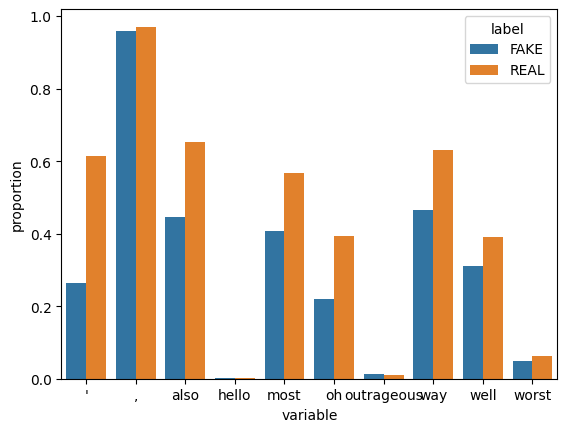

In [ ]:
sns.barplot(data=to_plot, x = 'variable', y = 'proportion', hue = "label")

Looked for the words with the most difference in their proportions and deleted the words that had 0 appearances.

The features that will be added are length of article, length of headline, ratio to lowercase and uppercase, frequency of proper nouns, frequency of periods/proper punctuation. ratio of punctuation to letters or words.

In [ ]:
# Example of the feature creation and implementation process
def headline_length(headline):
    return len(headline)

<img src="Screenshot 2023-11-09 at 3.45.34 PM.png" width="50%" align="left" />

## Model Training & Pipeline Function

To improve the model's ability to differentiate between real and fake news, we generate additional features based on the text content of each article. These features capture various characteristics of the text that may help the model make more accurate predictions:

### Feature Engineering Functions
These functions were used to generate different features to quantify various aspects of text that could help in distinguishing fake news from real news, improving the model's detection accuracy.

1. **punctuation_ratio**: Calculates the ratio of punctuation marks to the number of words in each article.
2. **numeric_ratio**: Calculates the ratio of numeric characters to words in each article.
3. **stopword_ratio**: Calculates the ratio of stopwords (e.g., "the", "is") to total words in the article.
4. **semi_colon_word_freq**: Calculates the ratio of semi-colons to words in each article.
5. **text_length**: Measures the number of words in each article.
6. **period_word_freq**: Calculates the ratio of periods (`?`) to the number of words.
7. **average_word_length**: Calculates the average length of words in each article.
8. **uppercase_letter_freq**: Calculates the ratio of uppercase letters to the total number of words.
9. **exclamation_mark_freq**: Calculates the ratio of exclamation marks (`!`) to words.
10. **url_ratio**: Calculates the ratio of URLs to the number of words.
11. **mention_ratio**: Calculates the ratio of mentions (`@`) to words.
12. **hashtag_ratio**: Calculates the ratio of hashtags (`#`) to words.
13. **emoji_ratio**: Calculates the ratio of emojis to the number of words.
14. **unique_words_ratio**: Calculates the ratio of unique words to total words in the article.
15. **repeated_letters_ratio**: Measures the ratio of repeated consecutive letters to total letters.
16. **consecutive_capital_letters_ratio**: Calculates the ratio of consecutive capital letters to total capital letters.
17. **special_characters_ratio**: Calculates the ratio of special characters (non-alphanumeric) to the total number of characters.
18. **contraction_ratio**: Calculates the ratio of contractions (e.g., "can't", "won't") to total words.
19. **word_count**: Measures the number of words in each article.
20. **unique_characters_ratio**: Calculates the ratio of unique alphabetic characters to the total number of alphabetic characters.
21. **consecutive_digit_ratio**: Calculates the ratio of consecutive digits to total digits.
22. **punctuation_sequence_ratio**: Calculates the ratio of sequences of punctuation marks to total punctuation marks.
23. **numeric_sequence_ratio**: Calculates the ratio of consecutive numeric characters to total numeric characters.
24. **unique_emojis_ratio**: Calculates the ratio of unique emojis to the number of words.
25. **sentiment_score**: Uses `TextBlob` to calculate the sentiment polarity of the text (positive or negative).
26. **all_caps_word_ratio**: Calculates the ratio of words that are entirely uppercase to the total number of words.
27. **positive_emoticon_ratio**: Calculates the ratio of positive emoticons (e.g., `:)`, `<3`) to words.
28. **negative_emoticon_ratio**: Calculates the ratio of negative emoticons (e.g., `:(`, `:'(`) to words.
29. **elongated_words_ratio**: Calculates the ratio of words with repeated characters (e.g., "sooo") to total words.
30. **ellipsis_ratio**: Calculates the ratio of ellipses (`...`) to the total number of words in each article.

These features help capture linguistic, punctuation, and stylistic patterns, which can be useful for detecting fake news articles.


In [ ]:
import re
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from textblob import TextBlob

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
from sklearn.preprocessing import StandardScaler

('scaler', StandardScaler()),

nltk.download('stopwords')

def punctuation_ratio(col):
    ratios = []
    for text in col:
        num_punctuation = sum(1 for char in text if char in string.punctuation)
        num_words = len(text.split())
        ratio = num_punctuation / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def numeric_ratio(col):
    ratios = []
    for text in col:
        num_numeric = sum(1 for char in text if char.isdigit())
        num_words = len(text.split())
        ratio = num_numeric / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def stopword_ratio(col):
    ratios = []
    stop_words = set(stopwords.words('english'))
    for text in col:
        words = [word for word in text.split() if word.lower() in stop_words]
        ratio = len(words) / len(text.split()) if len(text.split()) > 0 else 0
        ratios.append(ratio)
    return ratios

def semi_colon_word_freq(col):
    ratios = []
    for text in col:
        num_comma = text.count(";")
        num_words = len(text.split(" "))
        ratio = num_comma / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def text_length(col):
    ratios = []
    for text in col:
        text_length = len(text.split(" "))
        ratios.append(text_length)
    return ratios

def period_word_freq(col):
    ratios = []
    for text in col:
        num_periods = text.count("?")
        num_words = len(text.split(" "))
        ratio = num_periods / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def average_word_length(col):
    ratios = []
    for text in col:
        words = text.split()
        avg_length = sum(len(word) for word in words) / len(words) if len(words) > 0 else 0
        ratios.append(avg_length)
    return ratios

def uppercase_letter_freq(col):
    ratios = []
    for text in col:
        word_count = len(text.split()) if len(text.split()) > 0 else 1
        uppercase_letters = [char for char in text if char.isupper()]
        ratio = len(uppercase_letters) / word_count if word_count > 0 else 0
        ratios.append(ratio)
    return ratios
    
def exclamation_mark_freq(col):
    ratios = []
    for text in col:
        num_exclamation = text.count("!")
        num_words = len(text.split())
        ratio = num_exclamation / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def url_ratio(col):
    ratios = []
    for text in col:
        num_urls = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
        num_words = len(text.split())
        ratio = num_urls / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def mention_ratio(col):
    ratios = []
    for text in col:
        num_mentions = text.count("@")
        num_words = len(text.split())
        ratio = num_mentions / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def hashtag_ratio(col):
    ratios = []
    for text in col:
        num_hashtags = text.count("#")
        num_words = len(text.split())
        ratio = num_hashtags / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def emoji_ratio(col):
    ratios = []
    for text in col:
        num_emojis = len(re.findall(r'[^\w\s,]', text))  # Counting non-word characters as potential emojis
        num_words = len(text.split())
        ratio = num_emojis / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def unique_words_ratio(col):
    ratios = []
    for text in col:
        unique_words = set(text.split())
        ratio = len(unique_words) / len(text.split()) if len(text.split()) > 0 else 0
        ratios.append(ratio)
    return ratios

def repeated_letters_ratio(col):
    ratios = []
    for text in col:
        repeated_letters = sum(1 for char, next_char in zip(text, text[1:]) if char.isalpha() and char == next_char)
        num_letters = sum(1 for char in text if char.isalpha())
        ratio = repeated_letters / num_letters if num_letters > 0 else 0
        ratios.append(ratio)
    return ratios

def consecutive_capital_letters_ratio(col):
    ratios = []
    for text in col:
        consecutive_capitals = sum(1 for char, next_char in zip(text, text[1:]) if char.isupper() and next_char.isupper())
        num_capitals = sum(1 for char in text if char.isupper())
        ratio = consecutive_capitals / num_capitals if num_capitals > 0 else 0
        ratios.append(ratio)
    return ratios

def special_characters_ratio(col):
    ratios = []
    for text in col:
        special_characters = sum(1 for char in text if not char.isalnum())
        num_characters = len(text)
        ratio = special_characters / num_characters if num_characters > 0 else 0
        ratios.append(ratio)
    return ratios

def contraction_ratio(col):
    ratios = []
    contractions = {"ain't", "aren't", "can't", "couldn't", "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't",
                    "he'd", "he'll", "he's", "I'd", "I'll", "I'm", "I've", "isn't", "it's", "let's", "mustn't", "shan't",
                    "she'd", "she'll", "she's", "shouldn't", "that's", "there's", "they'd", "they'll", "they're",
                    "they've", "we'd", "we'll", "we're", "we've", "weren't", "what'll", "what're", "what's", "what've",
                    "where's", "who'd", "who'll", "who's", "won't", "wouldn't", "you'd", "you'll", "you're", "you've"}
    
    for text in col:
        words = text.split()
        contractions_count = sum(1 for word in words if word.lower() in contractions)
        ratio = contractions_count / len(words) if len(words) > 0 else 0
        ratios.append(ratio)
    return ratios

def word_count(col):
    counts = []
    for text in col:
        num_words = len(text.split())
        counts.append(num_words)
    return counts


def unique_characters_ratio(col):
    ratios = []
    for text in col:
        unique_characters = set(char.lower() for char in text if char.isalpha())
        num_characters = sum(1 for char in text if char.isalpha())
        ratio = len(unique_characters) / num_characters if num_characters > 0 else 0
        ratios.append(ratio)
    return ratios

def consecutive_digit_ratio(col):
    ratios = []
    for text in col:
        consecutive_digits = sum(1 for char, next_char in zip(text, text[1:]) if char.isdigit() and next_char.isdigit())
        num_digits = sum(1 for char in text if char.isdigit())
        ratio = consecutive_digits / num_digits if num_digits > 0 else 0
        ratios.append(ratio)
    return ratios

def punctuation_sequence_ratio(col):
    ratios = []
    for text in col:
        punctuation_sequence = sum(1 for char, next_char in zip(text, text[1:]) if char in string.punctuation and next_char in string.punctuation)
        num_punctuation = sum(1 for char in text if char in string.punctuation)
        ratio = punctuation_sequence / num_punctuation if num_punctuation > 0 else 0
        ratios.append(ratio)
    return ratios

def numeric_sequence_ratio(col):
    ratios = []
    for text in col:
        numeric_sequence = sum(1 for char, next_char in zip(text, text[1:]) if char.isdigit() and next_char.isdigit())
        num_numeric = sum(1 for char in text if char.isdigit())
        ratio = numeric_sequence / num_numeric if num_numeric > 0 else 0
        ratios.append(ratio)
    return ratios

def unique_emojis_ratio(col):
    ratios = []
    for text in col:
        emojis = set(re.findall(r'[^\w\s,]', text))  # Non-word characters as potential emojis
        num_words = len(text.split())
        ratio = len(emojis) / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def sentiment_score(col):
    scores = []
    for text in col:
        analysis = TextBlob(text)
        scores.append(analysis.sentiment.polarity)
    return scores

def all_caps_word_ratio(col):
    ratios = []
    for text in col:
        words = text.split()
        all_caps_words = [word for word in words if word.isupper()]
        ratio = len(all_caps_words) / len(words) if len(words) > 0 else 0
        ratios.append(ratio)
    return ratios

def positive_emoticon_ratio(col):
    ratios = []
    emoticons = set([":)", ":D", ";)", ":-)", ":]", "=)", ":}", ":>", ":3", ":-D", ";D", "<3"])
    for text in col:
        words = text.split()
        positive_emoticons = [word for word in words if word in emoticons]
        ratio = len(positive_emoticons) / len(words) if len(words) > 0 else 0
        ratios.append(ratio)
    return ratios

def negative_emoticon_ratio(col):
    ratios = []
    emoticons = set([":(", ";(", ":-(", ":|", ":\\", ":-/", ":'(", ">:(", ":-("])
    for text in col:
        words = text.split()
        negative_emoticons = [word for word in words if word in emoticons]
        ratio = len(negative_emoticons) / len(words) if len(words) > 0 else 0
        ratios.append(ratio)
    return ratios

def elongated_words_ratio(col):
    ratios = []
    for text in col:
        words = text.split()
        elongated_words = [word for word in words if re.search(r'(.)\1{2,}', word)]
        ratio = len(elongated_words) / len(words) if len(words) > 0 else 0
        ratios.append(ratio)
    return ratios

def ellipsis_ratio(col):
    ratios = []
    for text in col:
        num_ellipsis = text.count("...")
        num_words = len(text.split())
        ratio = num_ellipsis / num_words if num_words > 0 else 0
        ratios.append(ratio)
    return ratios

def pipeline(X_data):
    words_features = word_map(words, list(X_data["text"]))
    X_piped = pd.DataFrame(columns=words, data=words_features)
    X_piped["semicolon_text_ratio"] = semi_colon_word_freq(X_data["text"])
    X_piped["avg_word_length"] = average_word_length(X_data["text"])
    X_piped["uppercase_letter_freq"] = uppercase_letter_freq(X_data["text"])
    X_piped["exclamation_mark_freq"] = exclamation_mark_freq(X_data["text"])
    X_piped["punctuation_ratio"] = punctuation_ratio(X_data["text"])
    X_piped["numeric_ratio"] = numeric_ratio(X_data["text"])
    X_piped["stopword_ratio"] = stopword_ratio(X_data["text"])
    X_piped["url_ratio"] = url_ratio(X_data["text"])
    X_piped["mention_ratio"] = mention_ratio(X_data["text"])
    X_piped["hashtag_ratio"] = hashtag_ratio(X_data["text"])
    X_piped["emoji_ratio"] = emoji_ratio(X_data["text"])
    X_piped["unique_words_ratio"] = unique_words_ratio(X_data["text"])
    X_piped["repeated_letters_ratio"] = repeated_letters_ratio(X_data["text"])
    X_piped["consecutive_capital_letters_ratio"] = consecutive_capital_letters_ratio(X_data["text"])
    X_piped["special_characters_ratio"] = special_characters_ratio(X_data["text"])
    X_piped["contraction_ratio"] = contraction_ratio(X_data["text"])
    X_piped["word_count"] = word_count(X_data["text"])


    X_piped["unique_characters_ratio"] = unique_characters_ratio(X_data["text"])
    X_piped["consecutive_digit_ratio"] = consecutive_digit_ratio(X_data["text"])
    X_piped["punctuation_sequence_ratio"] = punctuation_sequence_ratio(X_data["text"])
    X_piped["numeric_sequence_ratio"] = numeric_sequence_ratio(X_data["text"])

    X_piped["unique_emojis_ratio"] = unique_emojis_ratio(X_data["text"])
    X_piped["sentiment_score"] = sentiment_score(X_data["text"])

    X_piped["all_caps_word_ratio"] = all_caps_word_ratio(X_data["text"])
    X_piped["positive_emoticon_ratio"] = positive_emoticon_ratio(X_data["text"])
    X_piped["negative_emoticon_ratio"] = negative_emoticon_ratio(X_data["text"])
    X_piped["elongated_words_ratio"] = elongated_words_ratio(X_data["text"])
    X_piped["ellipsis_ratio"] = ellipsis_ratio(X_data["text"])

    return X_piped


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model Accuracy Calculation

We evaluate the model using the following metrics:
1. **Training Accuracy**: This represents how well the model has learned from the training data.
2. **Testing Accuracy**: This represents how well the model generalizes to new, unseen data.

The purpose of calculating both training and testing accuracy is to identify if the model is **overfitting** (learning too much from training data and failing to generalize) or **underfitting** (not learning enough from the data).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob

X_train_piped = pipeline(X_train)
X_test_piped = pipeline(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_piped)
X_test_scaled = scaler.transform(X_test_piped) 

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
training_accuracy = model.score(X_train_scaled, y_train)
testing_accuracy = model.score(X_test_scaled, y_test)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.8033378439332431
Testing Accuracy: 0.7985270910047344


## Conclusion

In this project, we successfully built a machine learning model to classify news articles as either real or fake. The **Logistic Regression** model achieved a training accuracy of **80.3%** and a testing accuracy of **79.9%**, indicating that it generalized well to new data.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4d9be71-2611-452e-bb7a-f8e6efcd227c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>